# K_MEANS
- 无监督的问题：我们手里没有标签了
- 聚类：相似的问题分到一组
- 难点：如何评估，如何调参
- 步骤：
    - 确定K，得到多少个蔟
    - 质心:每一个蔟的质心，质心就是蔟中所有样本的均值（向量各维度取平均），方便迭代
    - 距离的度量：欧式距离或者余弦相似度（先标准化）
    - 优化目标：
        - $\min \sum_{i=1}^{K} \sum_{x \in C_i} \text{dist}(c_i, x)^2$ 距离到质心的距离的平方和最小
        - $C_i$为质心
- 原理图：
    - ![](../img/img_8.png)
- 缺点：
    - k值难以确定
    - 复杂度越样本呈线性关系
    - 难以发现任意形状的簇
    - 初始质心位置影响十分明显
- 演示链接
    - http://www.naftaliharris.com 
# DBSCAN 
Density-Based Spatial Clustering of Applications with Noise
- 核心对象：若某个点的密度达到算法设定的阈值则其为核心点。（即 r 邻域内点的数量不小于 minPts ）
-  ε- 邻域的距离阈值：设定的半径 r
- 直接密度可达：若某点 p 在点 q 的 r 邻域内，且 q 是核心点则 p - q 直接密度可达
- 密度可达：若有一个点的序列 $q_0$、$q_1$、…$q_k$，对任意 $q_i$ - $q_{i - 1} $是直接密度可达的，则称从 $q_0$ 到 $q_k$ 密度可达，这实际上是直接密度可达的 “传播”。
- 密度相连：若从某核心点 p 出发，点 q 和点 k 都是密度可达的，则称点 q 和点 k 是密度相连的。
- 边界点：属于某一个类的非核心点，不能发展下线了
- 噪声点：不属于任何一个类簇的点，从任何一个核心点出发都是密度不可达的
- 原理图
    - ![](../img/img_9.png)
    - A：核心点
    - B、C：边界点
    - N:离群点
- 步骤
    - 参数设定
        - D:输入数据集
        - ε:邻域半径
        - minPts:邻域内点数阈值
    - 参数指定方式
        - 半径 ε，可以根据 K 距离来设定：'找突变点'
            - K 距离：给定数据集 P={p (i); i=0,1,...n}，计算点 P (i) 到集合 D 的子集 S 中所有点之间的距离，距离按照从小到大的顺序排序，d (k) 就被称为 k - 距离。
        -  MinPts：k - 距离中 k 的值，一般取的小一些，多次尝试
    - 初始化
        - 标记所有数据对象为 unvisited（未访问状态）。
        - 选初始点：随机选一个 unvisited 对象 p。
        - 标记已访问：将 p 标记为 visited（已访问）。
        - 判断核心点：检查 p 的 ε-邻域（以 p 为中心、半径 ε 的区域 ）内，是否至少包含 MinPts 个对象：
        - ✅ 是核心点：
            - 新建一个簇 C，把 p 加入 C。
            - 令 N 为 p 的 ε-邻域 内所有对象的集合。
            - 遍历邻域点：对 N 中的每个点 p'，执行：
                - 若 p' 是 unvisited，标记为 visited。
                - 若 p' 是核心点（其 ε-邻域 内 ≥ MinPts 个对象 ），把这些邻域对象追加到 N（传播扩展邻域 ）。
                - 若 p' 还不属于任何簇，将其加入当前簇 C。
            - 遍历完 N 后，输出簇 C。
        - ❌ 非核心点：
            - 标记 p 为噪声点（不属于任何簇 ）。 
- 参数指定方式 
- 优点
    - 不需要指定簇个数
    - 可以发现任意形状的簇
    - 擅长找到离群点（检测任务）
    - 两个参数就够了
- 缺点
    - 高维数据有些困难，容易爆内存（可以做降维）
    - 参数难以选择（参数对结果的影响非常大）
    - Sklearn 中效率很慢（数据削减策略）

## 聚类算法实践
- Kmeans与DBSCAN对比
- 半监督问题解决方案
- 聚类评估方法

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family']=['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action='ignore')

## Kmeans

In [3]:
from sklearn.datasets import make_blobs

# 定义聚类中心
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

# 定义每个聚类的标准差
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

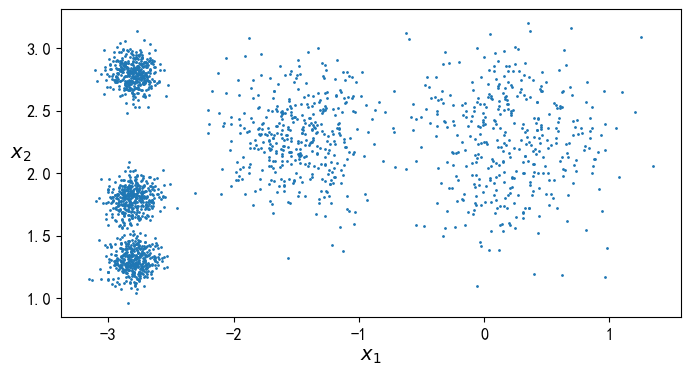

In [4]:
# 生成聚类数据
X, y = make_blobs(
    n_samples=2000, 
    centers=blob_centers, 
    cluster_std=blob_std, 
    random_state=7
)

# 定义绘图函数
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# 绘图
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### 决策边界

In [15]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=46)
y_pred = kmeans.fit_predict(X)

fit_predict(X)与.labels_是一致的

In [6]:
y_pred,kmeans.labels_

(array([2, 2, 4, ..., 1, 4, 2], shape=(2000,), dtype=int32),
 array([2, 2, 4, ..., 1, 4, 2], shape=(2000,), dtype=int32))

In [7]:
kmeans.cluster_centers_ #聚类中心

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [9]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

In [11]:
X_new = np.array([[0,2],[3,2],[3,4],[-1,-3]])
kmeans.predict(X_new) #预测新样本在那些蔟

array([0, 4, 4, 2], dtype=int32)

In [17]:
kmeans.transform(X_new) #每个点到中心点的距离

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29154026, 6.20644988, 4.78440844, 5.91661671, 6.39764869],
       [5.39272926, 5.12887616, 5.30642492, 6.06736166, 4.66245178]])

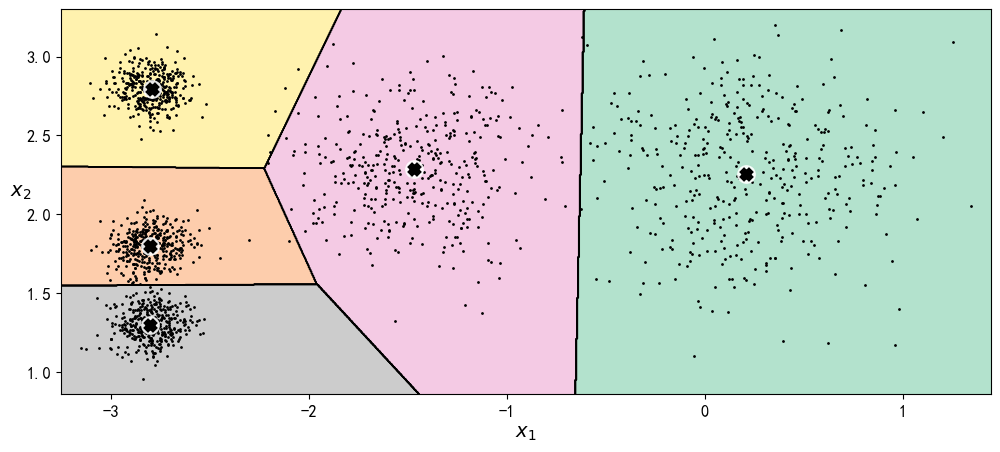

In [16]:
plt.figure(figsize=(12, 5))
plot_decision_boundaries(kmeans, X)
plt.show()

### 算法流程
- 随着迭代次数增加，聚类中心会更准确

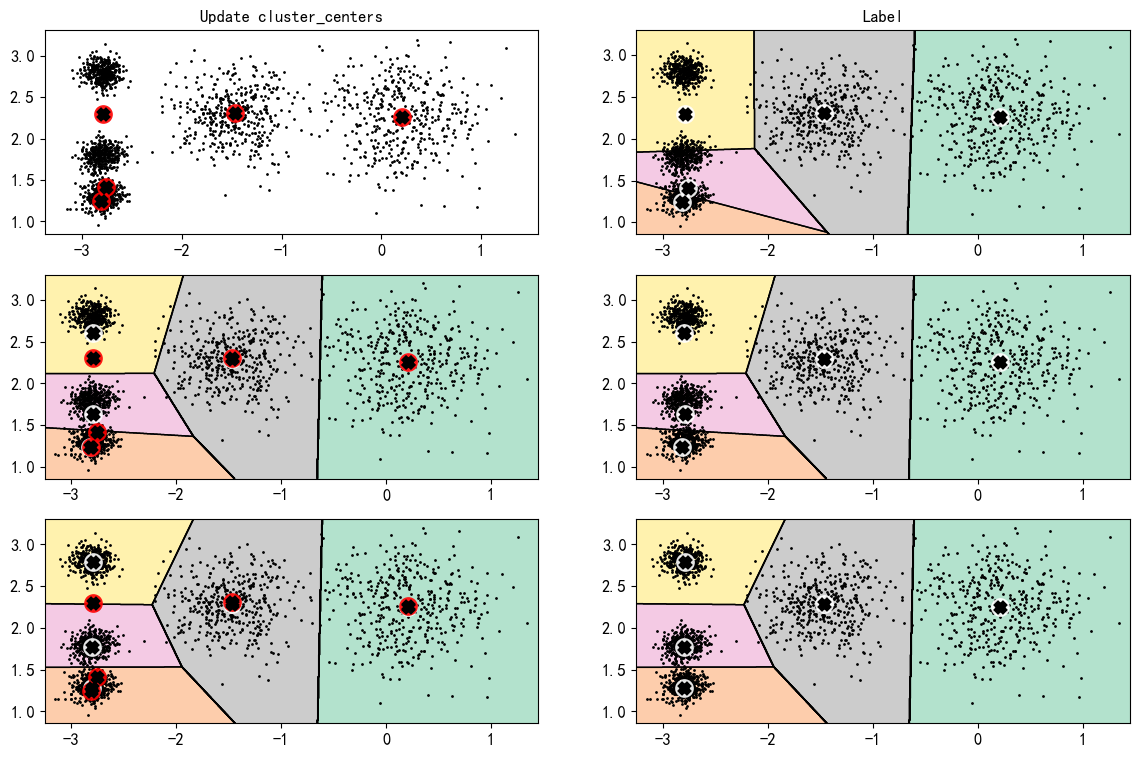

In [21]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(14, 9))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='black')

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color='r', cross_color='black' )

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)
plt.show()

### 不稳定结果
- 随机初始化不同，聚类结果可能不同

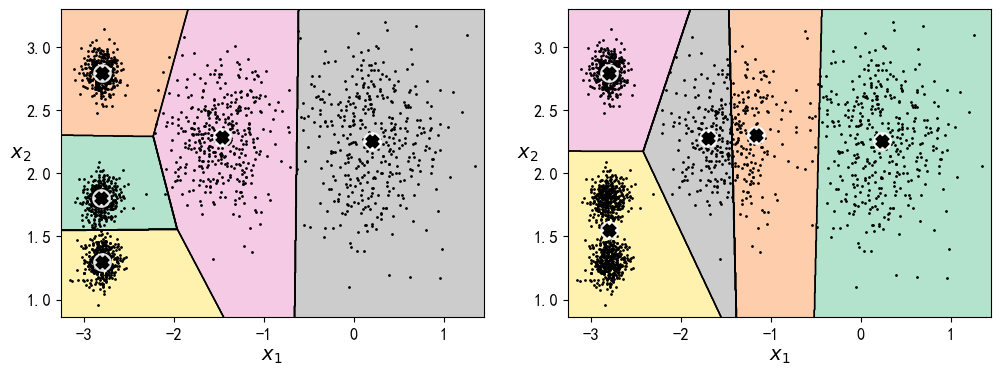

In [24]:
def plot_clusterer_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    plt.subplot(122)
    plot_decision_boundaries(c2, X)

# 初始化两个 KMeans 模型
c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=46)

# 调用比较函数（X 需是已准备好的数据集）
plot_clusterer_comparison(c1, c2, X)

### 评估方法
- inertia: 所有样本点到其最近的聚类中心的距离平方和(越小越好)

In [25]:
kmeans.score(X),kmeans.inertia_

(-211.59853725816836, 211.5985372581684)

In [26]:
c1.inertia_,c2.inertia_

(211.5985372581684, 236.859170505909)

轮廓系数
- $a_i$: 计算样本 i 到同簇其他样本的平均距离 $a_i$。$a_i$越小，说明样本 i 越应该被聚类到该簇。将 $a_i$ 称为样本 i 的簇内相似度。
- $b_i$: 计算样本 i 到其他簇$C_j$其他样本的平均距离 $b_i$。称为样本i 与其他簇$C_j$间不相似度。定义为样本 i 的簇间不相似度：$b_i = \min\{b_{i1}, b_{i2}, \ldots, b_{ik}\}$
- 轮廓系数：
    - $s_i = \frac{b_i - a_i}{max(a_i, b_i)}$
    - $s(i) = 
\begin{cases} 
1 - \dfrac{a(i)}{b(i)}, & a(i) < b(i) \\
0, & a(i) = b(i) \\
\dfrac{b(i)}{a(i)} - 1, & a(i) > b(i) 
\end{cases}$ 
    - s(i) 接近 1 ，则说明样本 i 聚类合理
    - s(i) 接近 -1 ，则说明样本 i 更应该分类到另外的簇；
    - s(i) 接近 0 ，则说明样本 i  在两个簇的边界上。

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.655517642572828)

蔟越多，和质心点的距离平方和越小

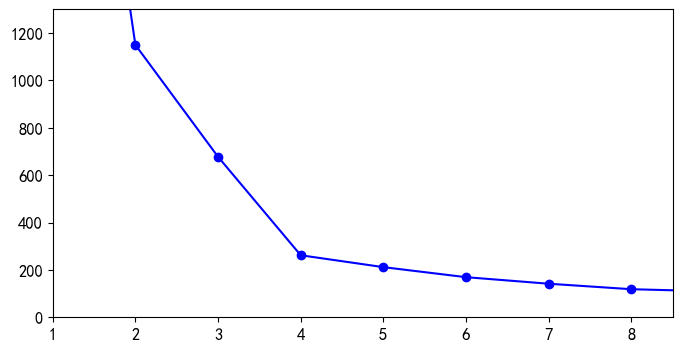

In [28]:
# 假设 X 是已准备好的数据集（特征矩阵）
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.axis([1, 8.5, 0, 1300])
plt.show()

轮廓系数显示k=4效果好

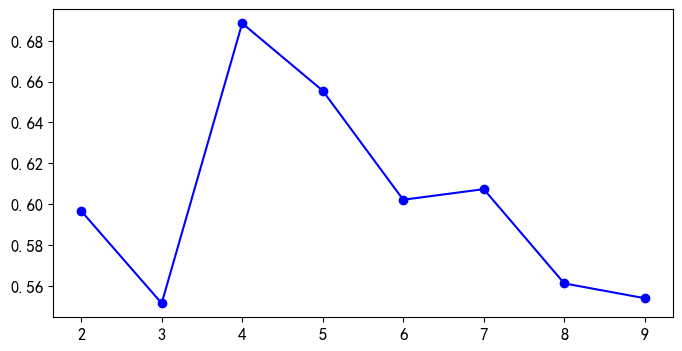

In [30]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
# print(silhouette_scores)
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
# plt.axis([1, 8.5, 0, 130])
plt.show()

Kmeans 缺陷

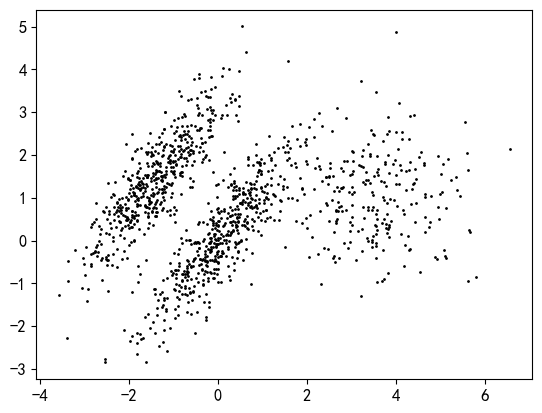

In [31]:
# 生成并处理数据
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

# 绘图
plot_data(X)

Text(0.5, 1.0, 'Bad - inertia = 2179.641197871638')

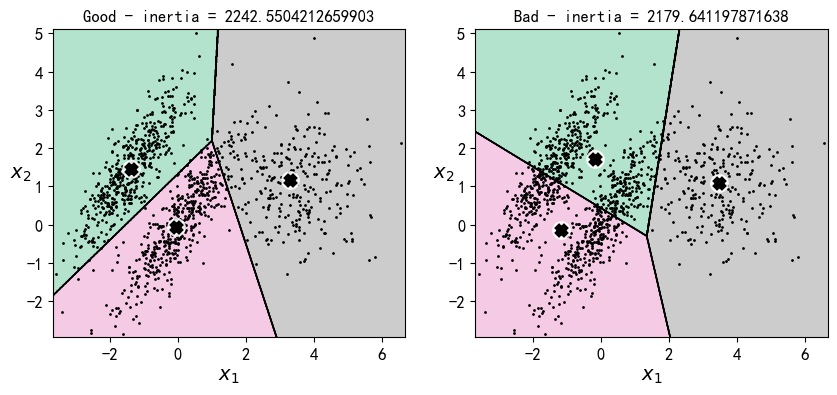

In [34]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5,2.5],[0.5,0],[4,0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=46)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize = (10,4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))
plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))

# 图像分割小例子

In [35]:
from matplotlib.image import imread
image = imread(r'../img/img_10.png')
image.shape

(580, 867, 3)

In [39]:
X=image.reshape(-1,3)
X.shape

(502860, 3)

In [41]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
kmeans.labels_,kmeans.cluster_centers_

(array([5, 5, 5, ..., 2, 2, 2], shape=(502860,), dtype=int32),
 array([[0.0255878 , 0.10946667, 0.00861999],
        [0.96695983, 0.8905006 , 0.04033726],
        [0.98939514, 0.99354285, 0.9842533 ],
        [0.22587432, 0.3811935 , 0.06726743],
        [0.3712645 , 0.5186458 , 0.17695403],
        [0.614329  , 0.65457654, 0.4527623 ],
        [0.71450907, 0.5116485 , 0.09004398],
        [0.1046695 , 0.2502116 , 0.02226944]], dtype=float32))

In [43]:
sgmented_img = kmeans.cluster_centers_[kmeans.labels_]
sgmented_img

array([[0.614329  , 0.65457654, 0.4527623 ],
       [0.614329  , 0.65457654, 0.4527623 ],
       [0.614329  , 0.65457654, 0.4527623 ],
       ...,
       [0.98939514, 0.99354285, 0.9842533 ],
       [0.98939514, 0.99354285, 0.9842533 ],
       [0.98939514, 0.99354285, 0.9842533 ]],
      shape=(502860, 3), dtype=float32)

In [44]:
sgmented_img=sgmented_img.reshape(image.shape)

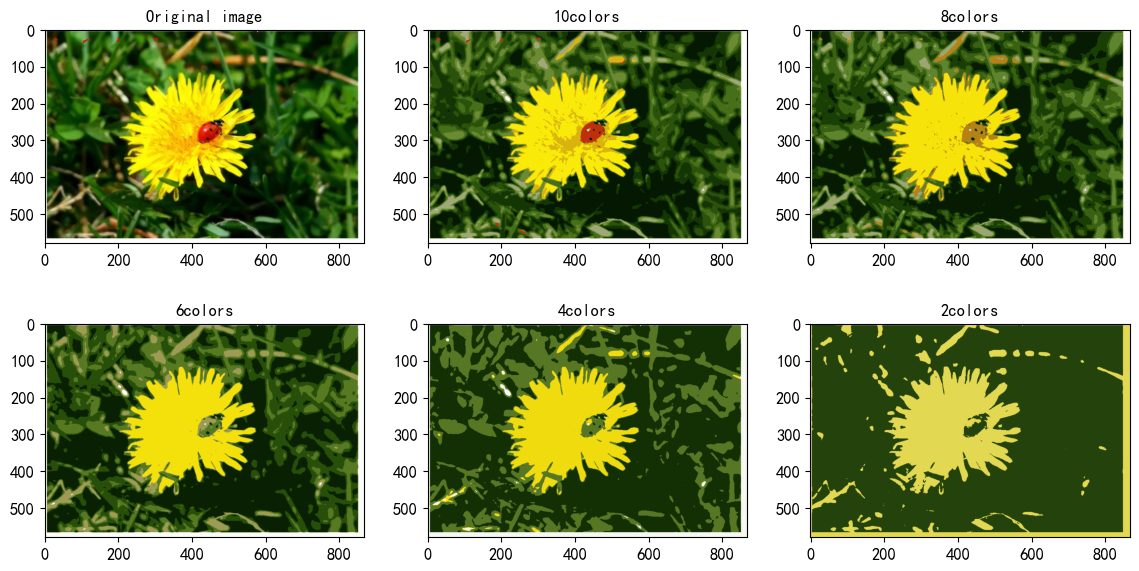

In [46]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(14,7))
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{}colors'.format(n_clusters))

### 半监督学习
首先，我们将数据集分成50个集群，然后对于每个聚类，我们找到最靠近质心的图像，我们将这些图像称为代表性图像

In [47]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

X_digits.shape

(1797, 64)

In [48]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [58]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

找每个蔟离蔟中心最近的样本(图像)是谁

In [59]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)#axis=0 表示沿着第 0 轴（垂直方向，即行方向）进行操作
representative_digit_idx

array([ 702,  850,  159,  244,  398, 1160,   66,  911,  602,  348, 1314,
       1071, 1290, 1121,   26,  832,  576,  841,  119,  596, 1208,  737,
        151,  861,  258,   35,  731,  648,  791, 1092, 1194, 1316,  976,
        460,  817,  114,  205,  753, 1311, 1060, 1138,  167,  749, 1108,
        256,  252,  783,   73, 1211, 1057])

In [60]:
X_representation_digits = X_train[representative_digit_idx]
X_representation_digits

array([[ 0.,  0.,  4., ..., 12.,  1.,  0.],
       [ 0.,  0.,  6., ...,  7.,  0.,  0.],
       [ 0.,  0.,  1., ..., 11.,  2.,  0.],
       ...,
       [ 0.,  0., 11., ..., 13., 16.,  7.],
       [ 0.,  0., 11., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(50, 64))

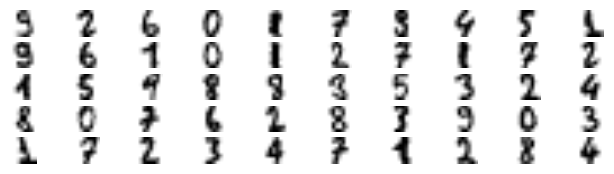

In [61]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representation_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [63]:
data = [
    [9, 2, 6, 0, 1, 7, 3, 4, 5, 1],
    [9, 6, 1, 0, 1, 2, 7, 1, 7, 2],
    [1, 5, 9, 8, 8, 3, 5, 3, 2, 4],
    [8, 0, 7, 6, 2, 8, 3, 9, 0, 3],
    [1, 7, 2, 3, 4, 7, 1, 2, 8, 4]
]
y_representative_digits = np.array(data).reshape(-1)
y_representative_digits

array([9, 2, 6, 0, 1, 7, 3, 4, 5, 1, 9, 6, 1, 0, 1, 2, 7, 1, 7, 2, 1, 5,
       9, 8, 8, 3, 5, 3, 2, 4, 8, 0, 7, 6, 2, 8, 3, 9, 0, 3, 1, 7, 2, 3,
       4, 7, 1, 2, 8, 4])

### 选择典型代表
现在我们有一个只有50个标签的训练集，他们每一个都是其集群的代表性图像，而不是完全随机的示例，训练效果就会更好

In [64]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representation_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9288888888888889

将训练数据的y_train改变成典型案例的标签（归结那个蔟就等于典型案例的标签）

In [65]:
y_train_propagated = np.empty(len(X_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(random_state=42)

In [66]:
log_reg.score(X_test, y_test)

0.94

选出20最接近代表性（标签）图像的图像做为训练数据

**NumPy 花式索引（Fancy Indexing）**
- 从 X_digits_dist 的每一行中，根据 kmeans.labels_ 的值取出对应列的元素，最终得到一个一维数组。

In [73]:
np.arange(len(X_train)), kmeans.labels_

(array([   0,    1,    2, ..., 1344, 1345, 1346], shape=(1347,)),
 array([ 7, 34, 31, ...,  1, 18, 17], shape=(1347,), dtype=int32))

In [85]:
X_cluster_dist=X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
X_cluster_dist

array([30.78086924, 15.40852026, 15.91176241, ..., 18.79931385,
       19.59080949, 17.6998429 ], shape=(1347,))

In [90]:
in_cluster=(kmeans.labels_==1)
in_cluster

array([False, False, False, ...,  True, False, False], shape=(1347,))

In [91]:
cluster_dist = X_cluster_dist[in_cluster]
cluster_dist

array([16.94194752, 22.64506164, 24.57388328, 19.11581024, 14.84117095,
       22.90345056, 21.59128139, 21.87619819, 16.49565121, 18.13917269,
       30.82005418, 18.3709315 , 18.79931385])

np.percentile 计算数组的百分位数。
若 percentile_closest=20，则 cutoff_distance 是第 20 百分位数，即有 20% 的样本距离小于此值。

In [92]:
cutoff_distance = np.percentile(cluster_dist, 20)
cutoff_distance

np.float64(17.420837587633457)

In [93]:
above_cutoff = (X_cluster_dist>cutoff_distance)
above_cutoff

array([ True, False, False, ...,  True,  True,  True], shape=(1347,))

In [71]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster=(kmeans.labels_==i) #返回Ture和False
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #排序找到20最接近代表性（标签）图像的图像
    above_cutoff = (X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff]=-1
    

In [94]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [96]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(random_state=42)

In [97]:
log_reg.score(X_test, y_test)

0.94

## DBSCAN

In [99]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

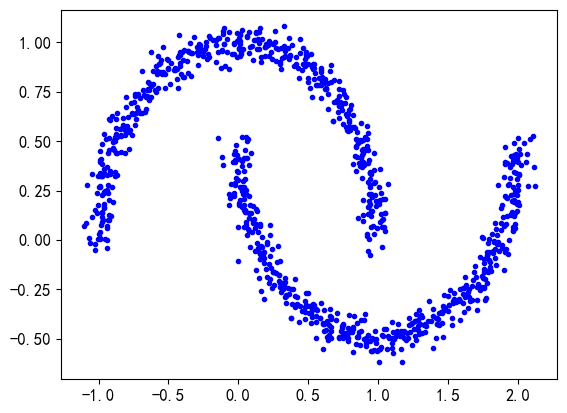

In [100]:
plt.plot(X[:, 0], X[:, 1], "b.")

In [101]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

-1 代表离群点

In [102]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

核心对象索引

In [ ]:
dbscan.core_sample_indices_[:10]

在 NumPy 中，np.unique() 函数用于找出数组中的唯一元素，并返回排序后的结果。它是数据处理中常用的工具，尤其适用于去重、统计类别或生成标签列表等场景。

In [103]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [104]:
dbscan2=DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [106]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c='r', marker='x', s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}", fontsize=14)

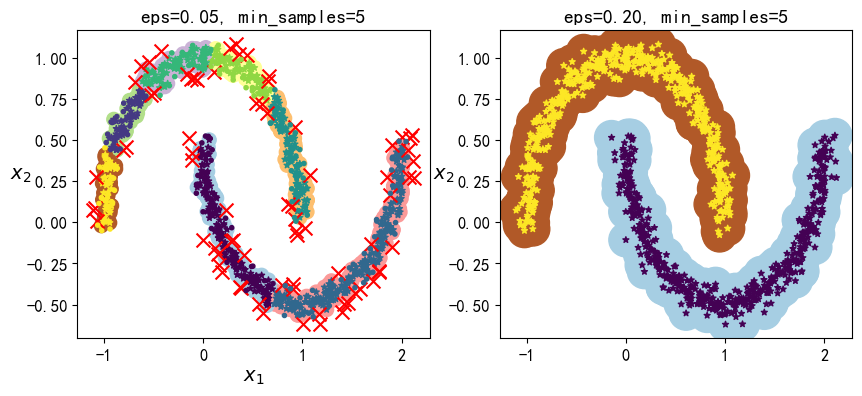

In [107]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_dbscan(dbscan, X,size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_xlabels=False)
plt.show()